In [1]:
import survey
import thinkstats
import math

### Excercise 1-3

##### 1. 아래 코드 실행

In [2]:

table =survey.Pregnancies()
table.ReadRecords()

In [3]:
print('Number of pregenancies', len(table.records))

Number of pregenancies 13593


In [4]:
table.records[0]

##### 2. 정상 출산된 아이수를 계산

In [5]:
from collections import Counter
dict_outcome = Counter(p.outcome for p in table.records)
dict_outcome

Counter({1: 9148, 2: 1862, 3: 120, 4: 1921, 5: 190, 6: 352})

In [6]:
print('정상 출산된 아이수 : ', dict_outcome[1])

정상 출산된 아이수 :  9148


In [7]:
list_normal_outcome = [p for p in table.records if p.outcome == 1]
len(list_normal_outcome)

9148

##### 3. 정상 출산된 아이들을 첫아이와 그외의 아이 그룹으로 나누어서 확인

In [8]:
list_normal_outcome_first = [p for p in list_normal_outcome if p.birthord == 1]
len(c)

4413

In [9]:
list_normal_outcome_others = [p for p in list_normal_outcome if p.birthord != 1]
len(list_normal_outcome_others)

4735

In [10]:
len(list_normal_outcome_first) + len(list_normal_outcome_others)

9148

##### 4. 첫아이를 임신했을  때의 평균 임신 기간과 그 외 아이를 임신했을 때의  평균을 비교

In [11]:
def get_average_prglength(pregnancies):
    sum_prg = sum(p.prglength for p in pregnancies)
    return sum_prg / len(pregnancies)

In [12]:
get_average_prglength(list_normal_outcome_first)

38.60095173351461

In [13]:
get_average_prglength(list_normal_outcome_others)

38.52291446673706

### Excercise 2-2

##### 첫 아이 임신 기간의 표준편차와 둘째 이후 아이 임신 기간의 표준편차를 계산

In [14]:
def get_stdev(t):
    mu, var = thinkstats.MeanVar(t)
    return math.sqrt(var)

In [15]:
get_stdev([p.prglength for p in list_normal_outcome_first])

2.7915850698243654

In [16]:
get_stdev([p.prglength for p in list_normal_outcome_others])

2.6155761106844913

#### Histogram

In [17]:
import Pmf
hist= Pmf.MakeHistFromList([1,2,2,3,5])
hist

In [18]:
hist.Freq(2)

2

In [19]:
hist.Freq(4)

0

In [20]:
hist.Values()

dict_keys([1, 2, 3, 5])

In [21]:
sorted(hist.Values())

[1, 2, 3, 5]

In [22]:
hist.Items()

dict_items([(1, 1), (2, 2), (3, 1), (5, 1)])

### Excercise 2-3

최빈값(`mode`)를 찾는 감수를 작성하세요.

In [23]:
def get_all_modes(t):
    hist = Pmf.MakeHistFromList(t)
    return sorted(hist.Items(), key=lambda x: x[1], reverse=True)

def get_mode(t):
    return get_all_modes(t)[0][1]

In [24]:
get_mode([1,2,2,3,5])

2

#### 히스토그램 그리기

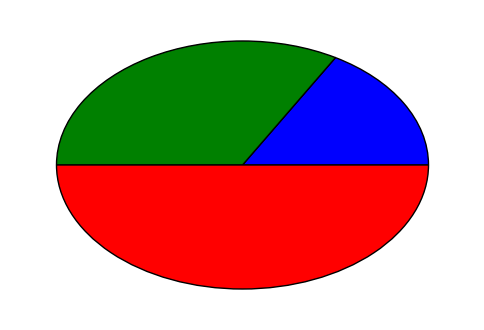

In [25]:
import matplotlib.pyplot as pyplot
pyplot.pie([1,2,3])
pyplot.show()

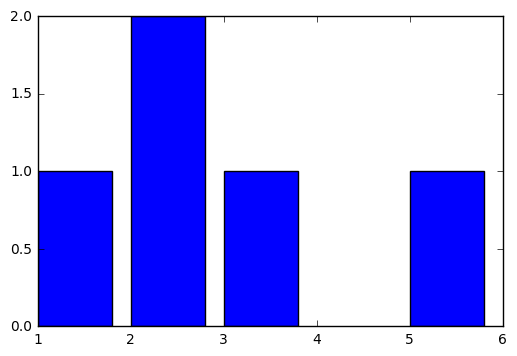

In [26]:
vals, freqs = hist.Render()
rectangles = pyplot.bar(vals, freqs)
pyplot.show()

앞서 살펴본 임신기간의 히스토그램

In [31]:
hist_first = Counter([int(p.prglength) for p in list_normal_outcome_first])
print(hist_first)

Counter({39: 2114, 40: 536, 41: 360, 38: 272, 37: 208, 42: 205, 36: 172, 35: 159, 43: 87, 30: 73, 32: 55, 34: 29, 33: 28, 28: 24, 44: 23, 26: 16, 31: 15, 29: 9, 24: 7, 45: 6, 22: 3, 48: 3, 0: 1, 17: 1, 20: 1, 21: 1, 23: 1, 25: 1, 27: 1, 46: 1, 47: 1})


In [33]:
hist_others = Counter([int(p.prglength) for p in list_normal_outcome_others])
print(hist_others)

Counter({39: 2579, 40: 580, 38: 335, 37: 247, 41: 227, 35: 152, 36: 149, 42: 123, 30: 65, 43: 61, 32: 60, 34: 31, 44: 23, 33: 21, 26: 19, 29: 12, 31: 12, 28: 8, 24: 6, 22: 4, 45: 4, 48: 4, 25: 2, 27: 2, 50: 2, 4: 1, 9: 1, 13: 1, 17: 1, 18: 1, 19: 1, 21: 1})


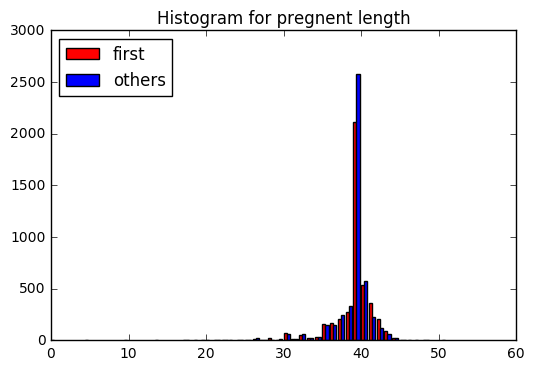

In [50]:
series1 = pyplot.bar(list(hist_first.keys()), list(hist_first.values()), 0.4, color='r')
series2 = pyplot.bar([k + 0.4 for k in hist_others.keys()], list(hist_others.values()), 0.4, color='b')
pyplot.legend((series1, series2), ('first','others'), loc=2)
pyplot.title('Histogram for pregnent length')
pyplot.show()

`Pmf` (확률질량함수) 사용하기

- 원래 `Pmf.py`는 파이썬 2 기준으로 작성되어 있어서 3에서 사용시 오류 발생
- `dict.itervalues()` -> `iter(dict.values())`로 수정

In [54]:
import Pmf

In [57]:
from importlib import reload
reload(Pmf)

<module 'Pmf' from '/Users/seokjoonyun/Github/Study/Blog/Python/ThinkStats/Pmf.py'>

* `Pmf.Prob(value)` : 해당 value 값의 확률값

In [71]:
sample_pmf = Pmf.MakePmfFromList([1,2,2,3,5])
sample_pmf.Prob(2)

0.4

* 확률값을 증가(`Incr`)하거나 곱하는(`Mult`)게 가능

In [72]:
sample_pmf.Incr(2,0.2)
sample_pmf.Prob(2)

0.6000000000000001

In [73]:
sample_pmf.Mult(2,0.5)
sample_pmf.Prob(2)

0.30000000000000004

* 확률값을 고친경우 `Total`을 이용해서 전체 확률값을 확인한 다음 1.0이 아닌 경우 `Normalize`를 해서 다시 맞춰줄수 있음

In [74]:
sample_pmf.Total()

0.8999999999999999

In [75]:
sample_pmf.Items()

dict_items([(1, 0.2), (2, 0.30000000000000004), (3, 0.2), (5, 0.2)])

In [76]:
sample_pmf.Normalize()
sample_pmf.Total()

1.0

In [77]:
sample_pmf.Items()

dict_items([(1, 0.22222222222222224), (2, 0.33333333333333337), (3, 0.22222222222222224), (5, 0.22222222222222224)])